In [12]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 326.8 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 521.8 kB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
df=pd.read_csv("2013_mrt_csv_with_utci/ECMWF_mrt_20130401_v1.1_con.area-subset.27.1.87.5.21.5.93.5.csv")
df.head(100)

,time,lat,lon,mrt,utci
0,2013-04-01 00:00:00,27.00,87.50,273.00055,279.91806
1,2013-04-01 00:00:00,27.00,87.75,273.21497,279.75600
2,2013-04-01 00:00:00,27.00,88.00,274.10623,279.06232
3,2013-04-01 00:00:00,27.00,88.25,274.10623,279.06232
4,2013-04-01 00:00:00,27.00,88.50,276.59375,281.48547
...,...,...,...,...,...
95,2013-04-01 00:00:00,26.25,92.50,287.33798,290.41867
96,2013-04-01 00:00:00,26.25,92.75,287.33798,290.41867
97,2013-04-01 00:00:00,26.25,93.00,286.91310,290.44280
98,2013-04-01 00:00:00,26.25,93.25,286.41560,289.24240


In [16]:
missing_values = df.isnull().sum()
print(missing_values)

time    0
lat     0
lon     0
mrt     0
utci    0
dtype: int64


In [20]:
heatmap_data_mrt = df.pivot_table(index='lat', columns='lon', values=['mrt','utci'])
heatmap_data_utci = df.pivot_table(index='lat', columns='lon', values='utci')

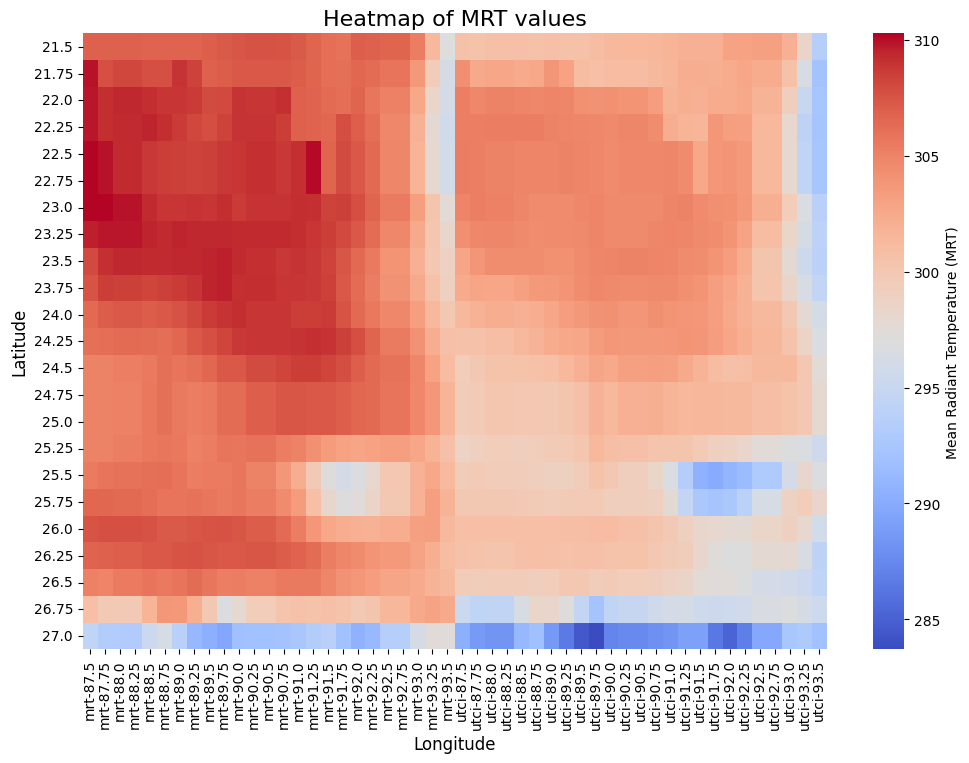

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data_mrt, 
    cmap="coolwarm", 
    annot=False, 
    cbar_kws={'label': 'Mean Radiant Temperature (MRT)'}
)

plt.title("Heatmap of MRT values", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.show()

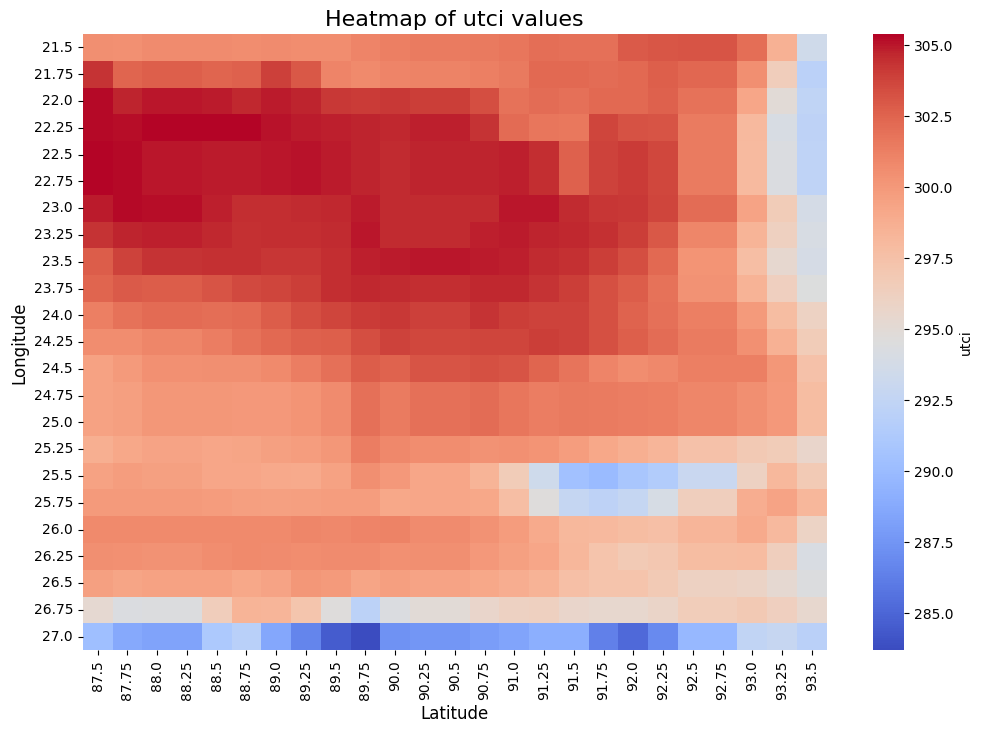

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data_utci, 
    cmap="coolwarm", 
    annot=False, 
    cbar_kws={'label': 'utci'}
)

plt.title("Heatmap of utci values", fontsize=16)
plt.ylabel("Longitude", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.show()

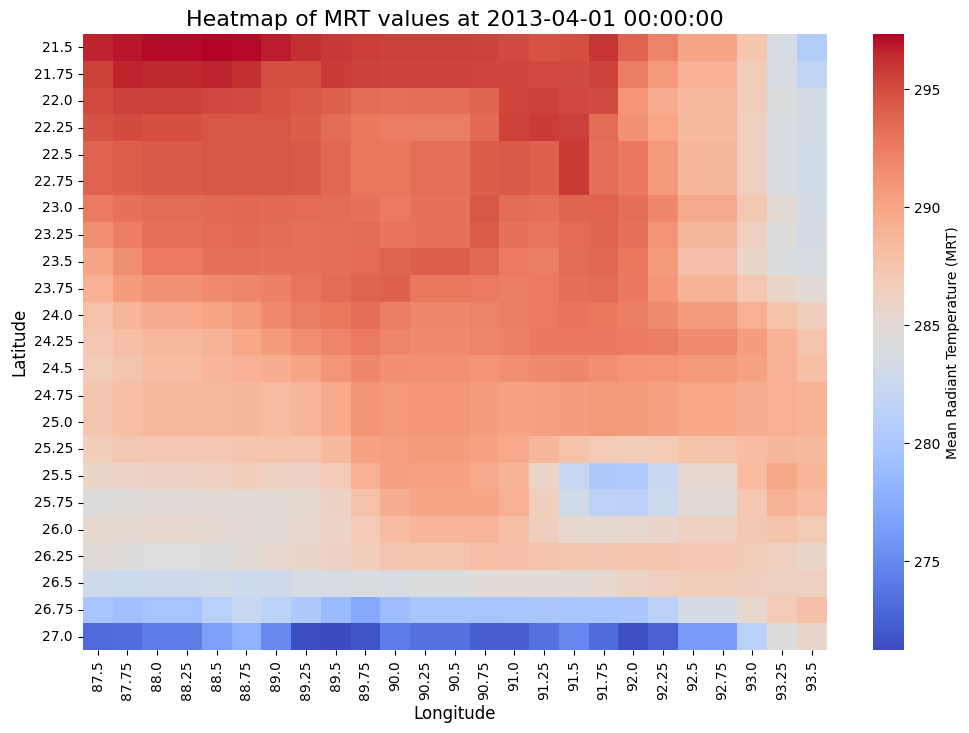

In [25]:
df['time'] = pd.to_datetime(df['time'])

# Select a specific time slice for visualization
time_slice = df['time'].iloc[0]  # Use the first timestamp as an example
data_time_slice = df[df['time'] == time_slice]

# Pivot data for MRT
heatmap_mrt = data_time_slice.pivot_table(index='lat', columns='lon', values='mrt')

# Pivot data for UTCI
heatmap_utci = data_time_slice.pivot_table(index='lat', columns='lon', values='utci')

# Plot Heatmap for MRT
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_mrt,
    cmap="coolwarm",
    annot=False,
    cbar_kws={'label': 'Mean Radiant Temperature (MRT)'}
)
plt.title(f"Heatmap of MRT values at {time_slice}", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.show()

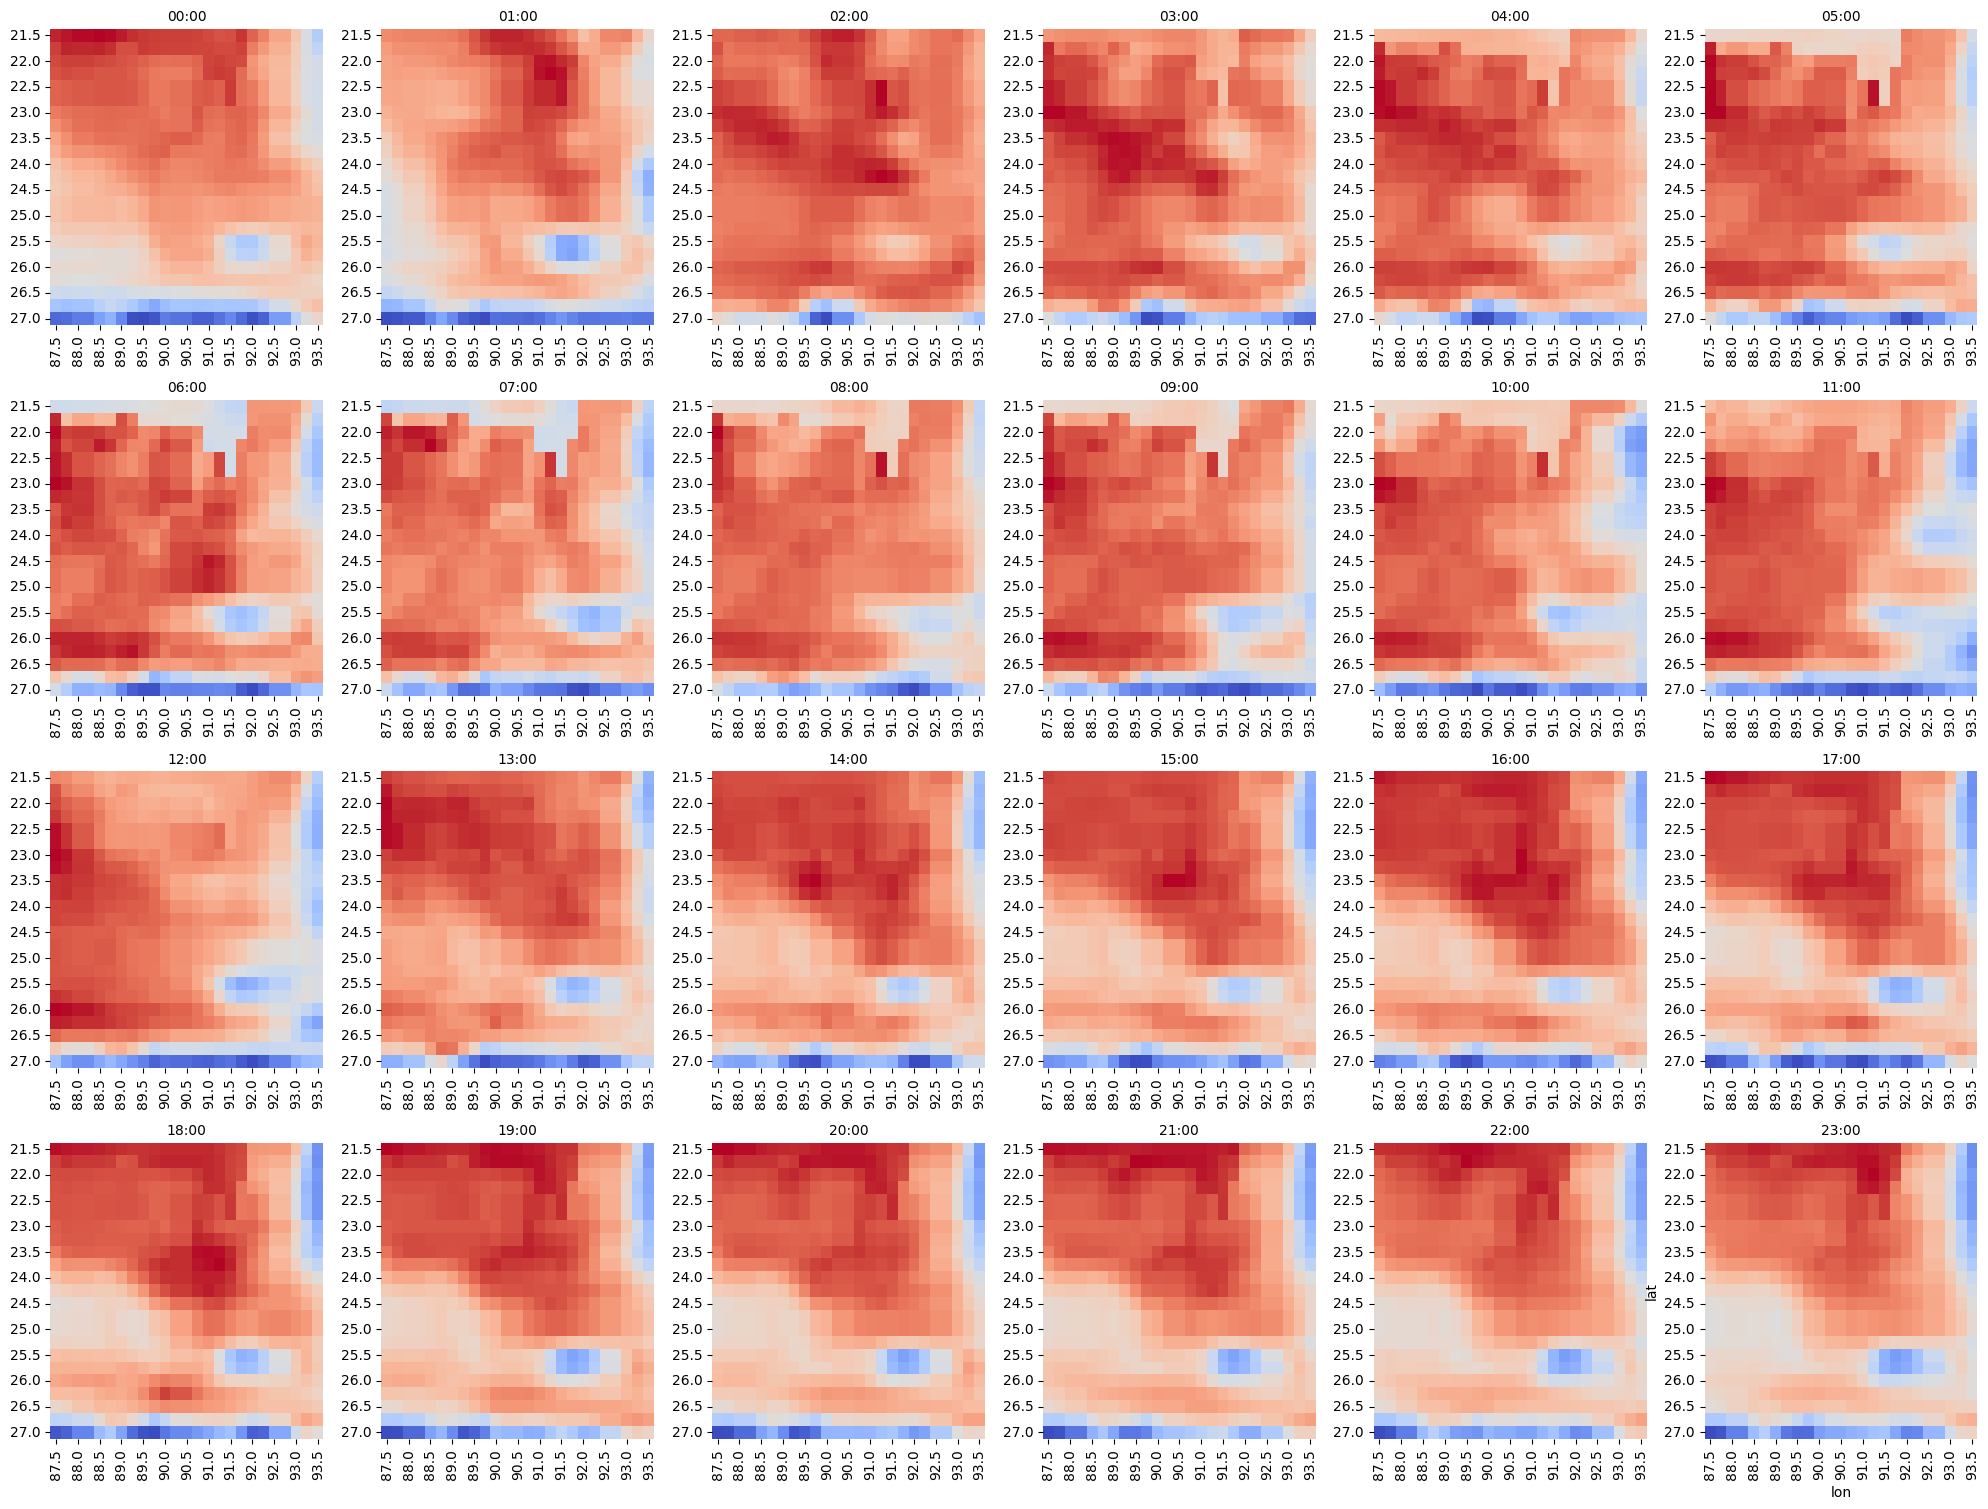

In [28]:
df['time'] = pd.to_datetime(df['time'])

# Extract unique timestamps
unique_timestamps = df['time'].unique()

# Define the number of rows and columns for the grid
n_rows = 4  # Adjust for better visualization
n_cols = 6  # Adjust for better visualization
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easier iteration

# Loop through timestamps and plot
for i, time_slice in enumerate(unique_timestamps):
    if i >= len(axes):  # Avoid index error if there are more timestamps than subplots
        break

    # Filter data for the specific timestamp
    data_time_slice = df[df['time'] == time_slice]

    
    heatmap_mrt = data_time_slice.pivot_table(index='lat', columns='lon', values='mrt')

    # Plot on the corresponding axis
    sns.heatmap(
        heatmap_mrt,
        cmap="coolwarm",
        annot=False,
        ax=axes[i],
        cbar=False  # Remove individual color bars for space
    )
    axes[i].set_title(f"{time_slice.strftime('%H:%M')}", fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout and add a single color bar
fig.tight_layout()
# cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Position for color bar
sns.heatmap(heatmap_mrt, cmap="coolwarm", cbar_ax=cbar_ax, cbar_kws={'label': 'MRT'})

# Show the plot
plt.show()

In [29]:
pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/94/8d/24f21e6a93ca418231aee3bddade7a0766c89c523832f29e08a8860f83e6/pyogrio-0.10.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/26/0c/b084e8839a117eaad8cb4fbaa81bbb24c6f183de0ee95c6c4e2770ab6f09/pyproj-3.7.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/b1/5a/6a67d929c467a1973b6bb9f0b00159cc343b02bf9a8d26db1abd2f87aa23/shapely-2.0.6-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   --- ------------------------------------ 30.7/323.6 kB 1.3 MB/s eta 0:00:01
   


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
pip install folium


  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/80/12/876692c8329d3981c49f1598ba699a752750516024d1d96a66eb78f2975e/folium-0.19.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/f8/9d/91cddd38bd00170aad1a4b198c47b4ed716be45c234e09b835af41f4e717/branca-0.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for xyzservices from https://files.pythonhosted.org/packages/4c/d3/e07ce413d16ef64e885bea37551eac4c5ca3ddd440933f9c94594273d0d9/xyzservices-2024.9.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/110.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.1 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/110.1 kB 325.1 kB/s eta 0:00:01
   ------------------------- ------------- 71.7/110.1 kB 558.5 kB/s eta 0:00:01
   ------


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import geopandas as gpd

geojson_file = "WEST BENGAL_DISTRICTS.geojson"  # Replace with your file path
gdf = gpd.read_file(geojson_file)

# Load the CSV with your heatmap data (e.g., MRT, UTCI)
file_path = "2019_mrt_csv_with_utci/ECMWF_mrt_20190401_v1.1_con.area-subset.27.1.87.5.21.5.93.5.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Ensure the 'time' column is in datetime format
data['time'] = pd.to_datetime(data['time'])

# Select a time slice, for example, the first row
time_slice = data['time'].iloc[0]
data_time_slice = data[data['time'] == time_slice]

# Pivot data for MRT
heatmap_mrt = data_time_slice.pivot_table(index='lat', columns='lon', values='mrt')

# Pivot data for UTCI
heatmap_utci = data_time_slice.pivot_table(index='lat', columns='lon', values='utci')

# Plot Heatmap for MRT
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_mrt,
    cmap="coolwarm",  # Choose your color map
    annot=False,
    cbar_kws={'label': 'Mean Radiant Temperature (MRT)'},
    linewidths=0.5
)

# Plot the geojson map of West Bengal borders
gdf.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=0.5)

# Customize the plot
plt.title(f"Heatmap of MRT values at {time_slice} with West Bengal Borders", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.show()

DataSourceError: WEST BENGAL_DISTRICTS.geojson: No such file or directory

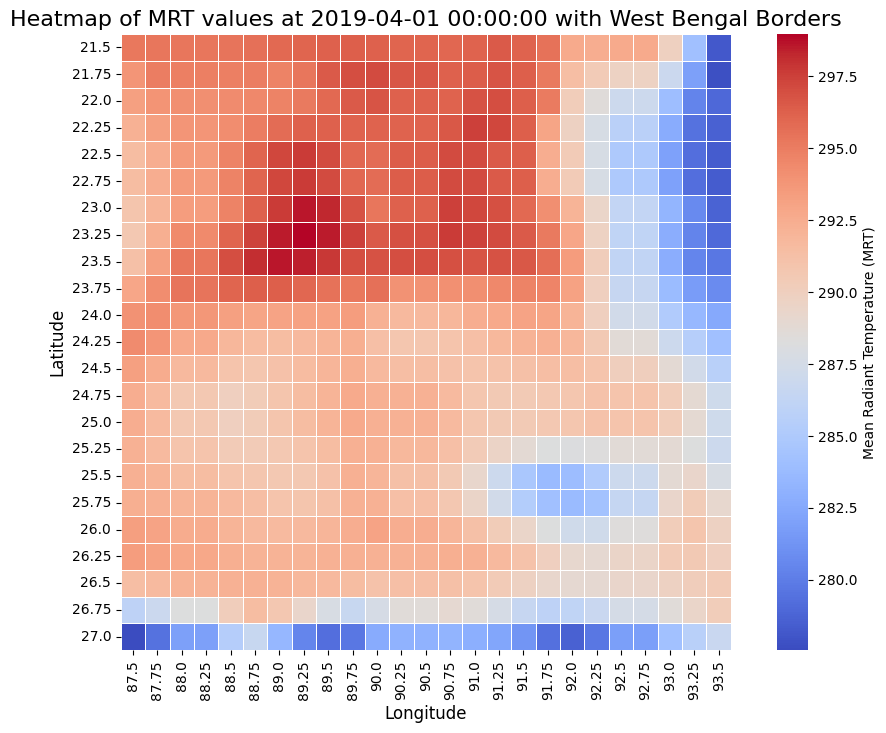

In [41]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the geojson file for West Bengal state/district boundaries
geojson_file = "WEST BENGAL_STATE.geojson"  # Replace with your file path
gdf = gpd.read_file(geojson_file)

# Ensure the GeoDataFrame uses the same CRS as the heatmap data (WGS84: EPSG:4326)
gdf = gdf.to_crs(epsg=4326)  # Reproject to WGS84 if needed

# Load the CSV with your heatmap data (e.g., MRT, UTCI)
file_path = "2019_mrt_csv_with_utci/ECMWF_mrt_20190401_v1.1_con.area-subset.27.1.87.5.21.5.93.5.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Ensure the 'time' column is in datetime format
data['time'] = pd.to_datetime(data['time'])

# Select a time slice, for example, the first row
time_slice = data['time'].iloc[0]
data_time_slice = data[data['time'] == time_slice]

# Pivot data for MRT
heatmap_mrt = data_time_slice.pivot_table(index='lat', columns='lon', values='mrt')

# Pivot data for UTCI
heatmap_utci = data_time_slice.pivot_table(index='lat', columns='lon', values='utci')

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Heatmap for MRT
sns.heatmap(
    heatmap_mrt,
    cmap="coolwarm",  # Choose your color map
    annot=False,
    cbar_kws={'label': 'Mean Radiant Temperature (MRT)'},
    linewidths=0.5,
    ax=ax  # Ensure the heatmap is plotted on the same axes
)

# Plot the geojson map of West Bengal borders on top of the heatmap
gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Customize the plot
ax.set_title(f"Heatmap of MRT values at {time_slice} with West Bengal Borders", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Show the plot
plt.show()

# # Plot Heatmap for UTCI
# fig, ax = plt.subplots(figsize=(12, 8))  # Create a new figure for the UTCI plot

# sns.heatmap(
#     heatmap_utci,
#     cmap="viridis",  # Choose your color map
#     annot=False,
#     cbar_kws={'label': 'Universal Thermal Climate Index (UTCI)'},
#     linewidths=0.5,
#     ax=ax  # Ensure the heatmap is plotted on the same axes
# )

# # Plot the geojson map of West Bengal borders on top of the heatmap
# gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# # Customize the plot
# ax.set_title(f"Heatmap of UTCI values at {time_slice} with West Bengal Borders", fontsize=16)
# ax.set_xlabel("Longitude", fontsize=12)
# ax.set_ylabel("Latitude", fontsize=12)

# # Show the plot
# plt.show()


<Figure size 1200x800 with 0 Axes>

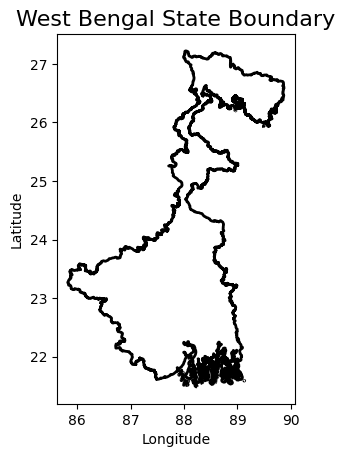

In [5]:
# Load the .geojson file for state or district
state_file_path = 'WEST BENGAL_STATE.geojson'  # Replace with the actual path to the state.geojson
district_file_path = 'WEST BENGAL_DISTRICTS.geojson'  # Replace with the actual path to the district.geojson

state_data = gpd.read_file(state_file_path)

# For district boundary (use district.geojson)
district_data = gpd.read_file(district_file_path)

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
state_data.plot(edgecolor='black', facecolor='none', linewidth=2)  # Adjust the line style and color as needed
plt.title('West Bengal State Boundary', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Figure size 1200x800 with 0 Axes>

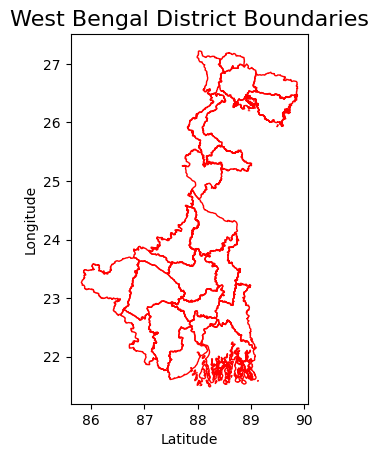

In [6]:
plt.figure(figsize=(12, 8))
district_data.plot(edgecolor='red', facecolor='none', linewidth=1)
plt.title('West Bengal District Boundaries', fontsize=16)
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.show()

In [7]:
print(gdf.crs)
print(data[['lat', 'lon']].head())  # Check the first few rows of lat, lon

EPSG:4326


NameError: name 'data' is not defined

GeoJSON CRS: EPSG:4326
    lat    lon
0  27.5  85.50
1  27.5  85.75
2  27.5  86.00
3  27.5  86.25
4  27.5  86.50


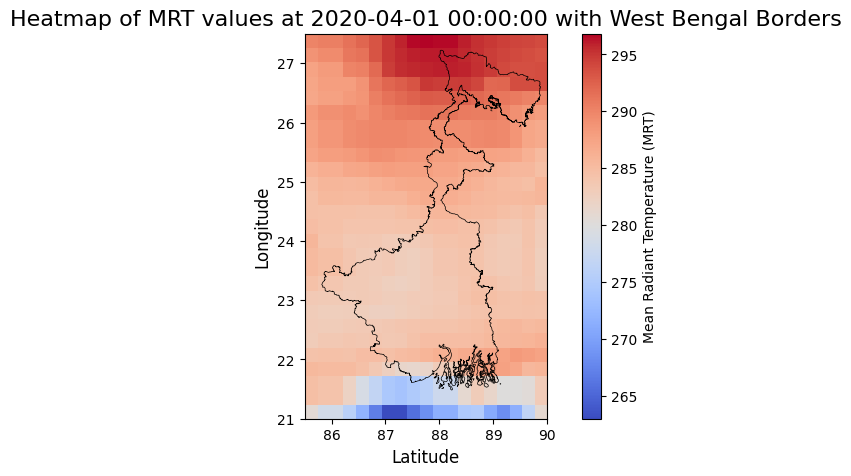

In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the geojson file for West Bengal state/district boundaries
geojson_file = "WEST BENGAL_STATE.geojson"  # Replace with your file path
gdf = gpd.read_file(geojson_file)

# Check the CRS of the GeoJSON file
print("GeoJSON CRS:", gdf.crs)

# Reproject to WGS84 (if needed)
gdf = gdf.to_crs(epsg=4326)  # Ensure it's in the same CRS as lat/lon data

# Load the CSV with your heatmap data (e.g., MRT, UTCI)
file_path = "2020_mrt_csv_with_utci/mrt_with_utci_20200401.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Ensure the 'time' column is in datetime format
data['time'] = pd.to_datetime(data['time'])

# Check the first few rows of lat, lon
print(data[['lat', 'lon']].head())

# Select a time slice, for example, the first row
time_slice = data['time'].iloc[0]
data_time_slice = data[data['time'] == time_slice]

# Pivot data for MRT
heatmap_mrt = data_time_slice.pivot_table(index='lat', columns='lon', values='mrt')

# Pivot data for UTCI
heatmap_utci = data_time_slice.pivot_table(index='lat', columns='lon', values='utci')

# Plot Heatmap for MRT using imshow (since sns.heatmap is not suitable for geographic data)
fig, ax = plt.subplots(figsize=(9, 5))

# Plot the heatmap using imshow (more control over the plot)
heatmap = ax.imshow(heatmap_mrt, cmap="coolwarm", aspect='auto', extent=[data['lon'].min(), data['lon'].max(), data['lat'].min(), data['lat'].max()])
cbar = fig.colorbar(heatmap)
cbar.set_label('Mean Radiant Temperature (MRT)')

# Plot the geojson map of West Bengal borders on top of the heatmap
gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Customize the plot
ax.set_title(f"Heatmap of MRT values at {time_slice} with West Bengal Borders", fontsize=16)
ax.set_ylabel("Longitude", fontsize=12)
ax.set_xlabel("Latitude", fontsize=12)

# Show the plot
plt.show()




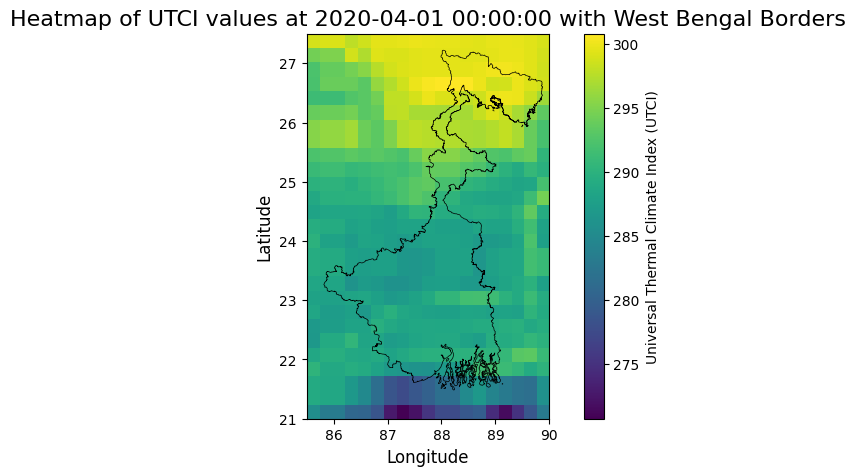

In [9]:
# Plot Heatmap for UTCI
fig, ax = plt.subplots(figsize=(9, 5))  # Create a new figure for the UTCI plot

# Plot the heatmap using imshow for UTCI
heatmap = ax.imshow(heatmap_utci, cmap="viridis", aspect='auto', extent=[data['lon'].min(), data['lon'].max(), data['lat'].min(), data['lat'].max()])
cbar = fig.colorbar(heatmap)
cbar.set_label('Universal Thermal Climate Index (UTCI)')

# Plot the geojson map of West Bengal borders on top of the heatmap
gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Customize the plot
ax.set_title(f"Heatmap of UTCI values at {time_slice} with West Bengal Borders", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Show the plot
plt.show()

GeoJSON CRS: EPSG:4326


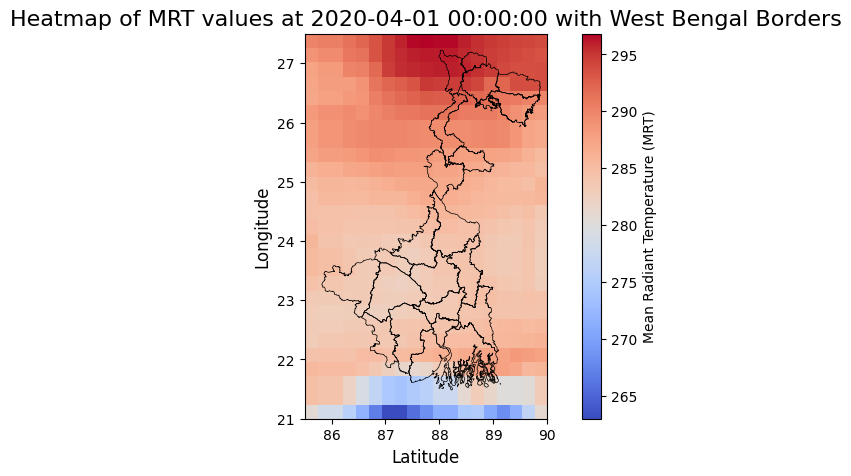

In [92]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the geojson file for West Bengal state/district boundaries
geojson_file = "WEST BENGAL_DISTRICTS.geojson"  # Replace with your file path
gdf = gpd.read_file(geojson_file)

# Check the CRS of the GeoJSON file
print("GeoJSON CRS:", gdf.crs)

# Reproject to WGS84 (if needed)
gdf = gdf.to_crs(epsg=4326)  # Ensure it's in the same CRS as lat/lon data

# Load the CSV with your heatmap data (e.g., MRT, UTCI)
file_path = "2020_mrt_csv_with_utci/mrt_with_utci_20200401.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Ensure the 'time' column is in datetime format
data['time'] = pd.to_datetime(data['time'])

# Check the first few rows of lat, lon
# print(data[['lat', 'lon']].head())

# Select a time slice, for example, the first row
time_slice = data['time'].iloc[0]
data_time_slice = data[data['time'] == time_slice]

# Pivot data for MRT
heatmap_mrt = data_time_slice.pivot_table(index='lat', columns='lon', values='mrt')

# Pivot data for UTCI
heatmap_utci = data_time_slice.pivot_table(index='lat', columns='lon', values='utci')

# Plot Heatmap for MRT using imshow (since sns.heatmap is not suitable for geographic data)
fig, ax = plt.subplots(figsize=(9, 5))

# Plot the heatmap using imshow (more control over the plot)
heatmap = ax.imshow(heatmap_mrt, cmap="coolwarm", aspect='auto', extent=[data['lon'].min(), data['lon'].max(), data['lat'].min(), data['lat'].max()])
cbar = fig.colorbar(heatmap)
cbar.set_label('Mean Radiant Temperature (MRT)')

# Plot the geojson map of West Bengal borders on top of the heatmap
gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)


ax.set_title(f"Heatmap of MRT values at {time_slice} with West Bengal Borders", fontsize=16)
ax.set_ylabel("Longitude", fontsize=12)
ax.set_xlabel("Latitude", fontsize=12)


plt.show()

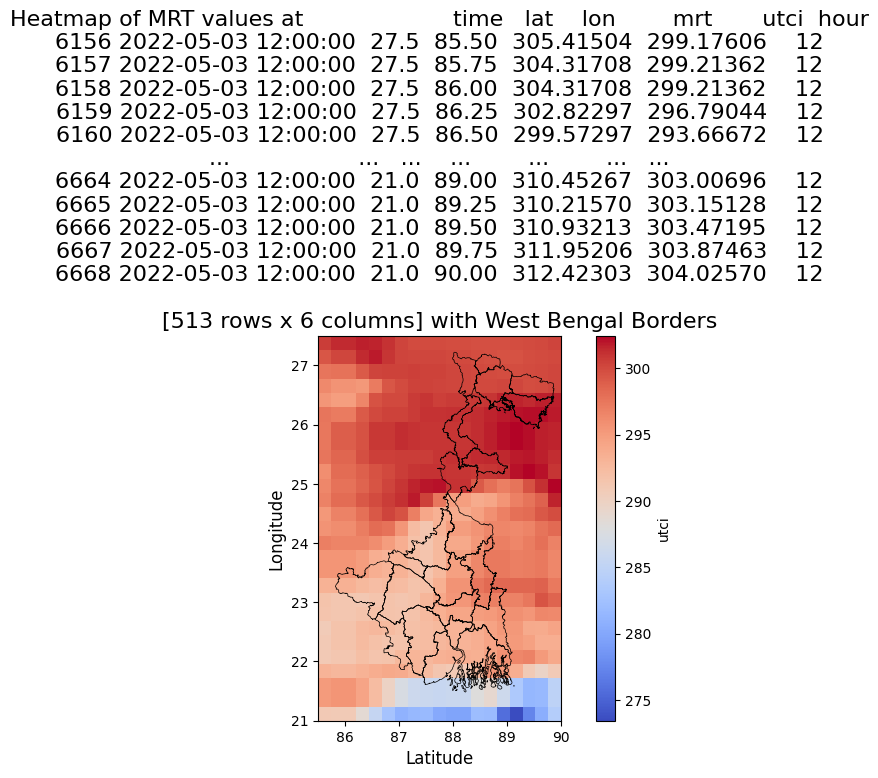

In [91]:
fig, ax = plt.subplots(figsize=(9, 5))

# Plot the heatmap using imshow (more control over the plot)
heatmap = ax.imshow(heatmap_utci, cmap="coolwarm", aspect='auto', extent=[data['lon'].min(), data['lon'].max(), data['lat'].min(), data['lat'].max()])
cbar = fig.colorbar(heatmap)
cbar.set_label('utci')

# Plot the geojson map of West Bengal borders on top of the heatmap
gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Customize the plot
ax.set_title(f"Heatmap of MRT values at {time_slice} with West Bengal Borders", fontsize=16)
ax.set_ylabel("Longitude", fontsize=12)
ax.set_xlabel("Latitude", fontsize=12)

# Show the plot
plt.show()

GeoJSON CRS: EPSG:4326
    lat    lon  hour
0  27.5  85.50     0
1  27.5  85.75     0
2  27.5  86.00     0
3  27.5  86.25     0
4  27.5  86.50     0


IndexError: index 12 is out of bounds for axis 0 with size 12

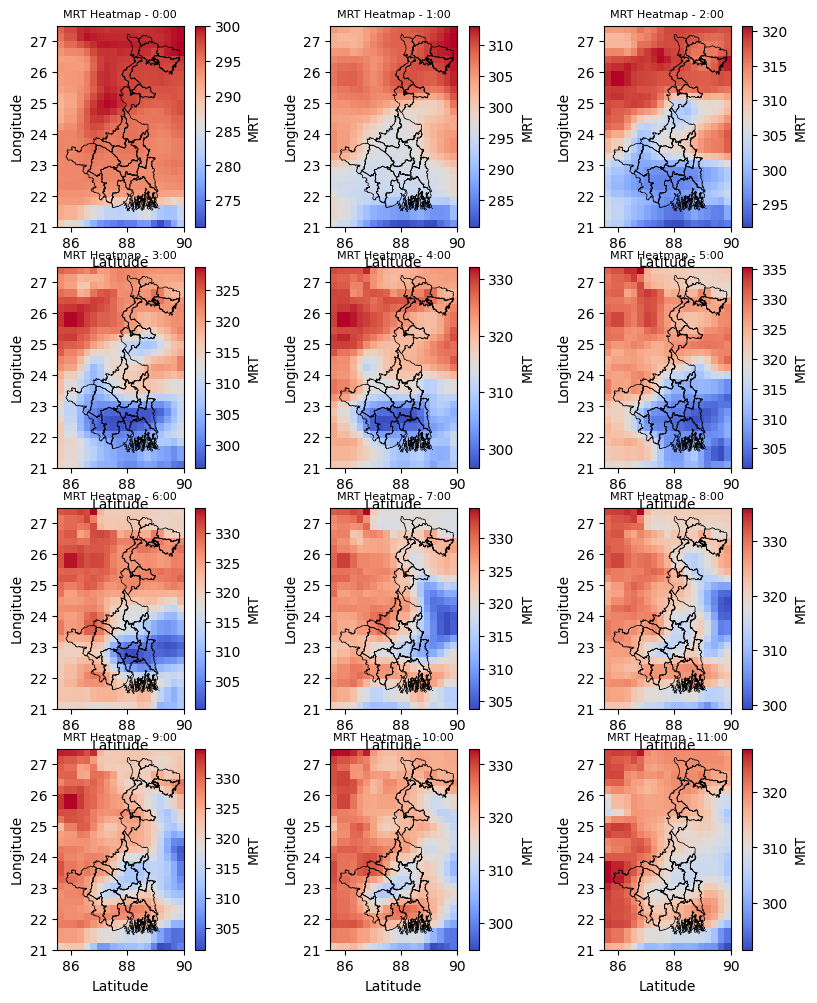

In [86]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


geojson_file = "WEST BENGAL_DISTRICTS.geojson"  
gdf = gpd.read_file(geojson_file)


print("GeoJSON CRS:", gdf.crs)


gdf = gdf.to_crs(epsg=4326)  


file_path = "2022_mrt_csv_with_utci/mrt_with_utci_20220503.csv"  
data = pd.read_csv(file_path)


data['time'] = pd.to_datetime(data['time'])


data['hour'] = data['time'].dt.hour


print(data[['lat', 'lon', 'hour']].head())


fig, axes = plt.subplots(4, 3, figsize=(10, 12))  
axes = axes.flatten()  


for hour in range(0, 23):
    time_slice = data[data['hour'] == hour]  
    
    
    heatmap_mrt = time_slice.pivot_table(index='lat', columns='lon', values='mrt')

    ax = axes[hour]  

    
    heatmap = ax.imshow(
        heatmap_mrt, cmap="coolwarm", aspect='auto',
        extent=[data['lon'].min(), data['lon'].max(), data['lat'].min(), data['lat'].max()]
    )
    cbar = fig.colorbar(heatmap, ax=ax)
    cbar.set_label('MRT')

    
    gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

    # Customize the plot
    ax.set_title(f"MRT Heatmap - {hour}:00", fontsize=8)
    ax.set_xlabel("Latitude", fontsize=10)
    ax.set_ylabel("Longitude", fontsize=10)


fig.subplots_adjust(hspace=0.4)  
plt.tight_layout()


plt.show()


GeoJSON CRS: EPSG:4326


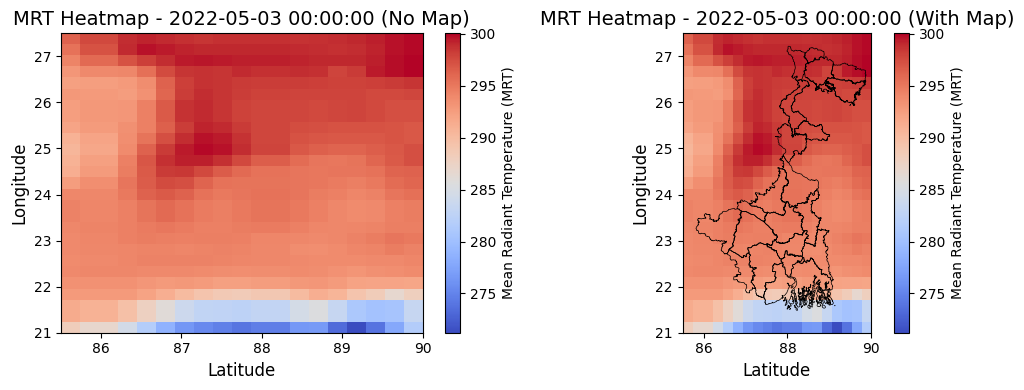

In [85]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

geojson_file = "WEST BENGAL_DISTRICTS.geojson"  
gdf = gpd.read_file(geojson_file)
print("GeoJSON CRS:", gdf.crs)
gdf = gdf.to_crs(epsg=4326)  


file_path = "2022_mrt_csv_with_utci/mrt_with_utci_20220503.csv"  
data = pd.read_csv(file_path)

data['time'] = pd.to_datetime(data['time'])

time_slice = data['time'].iloc[0]
data_time_slice = data[data['time'] == time_slice]

heatmap_mrt = data_time_slice.pivot_table(index='lat', columns='lon', values='mrt')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

ax_no_map = axes[0]
heatmap_no_map = ax_no_map.imshow(
    heatmap_mrt, cmap="coolwarm", aspect='auto',
    extent=[data['lon'].min(), data['lon'].max(), data['lat'].min(), data['lat'].max()]
)
cbar_no_map = fig.colorbar(heatmap_no_map, ax=ax_no_map)
cbar_no_map.set_label('Mean Radiant Temperature (MRT)')

ax_no_map.set_title(f"MRT Heatmap - {time_slice} (No Map)", fontsize=14)
ax_no_map.set_ylabel("Longitude", fontsize=12)
ax_no_map.set_xlabel("Latitude", fontsize=12)


ax_with_map = axes[1]
heatmap_with_map = ax_with_map.imshow(
    heatmap_mrt, cmap="coolwarm", aspect='auto',
    extent=[data['lon'].min(), data['lon'].max(), data['lat'].min(), data['lat'].max()]
)
cbar_with_map = fig.colorbar(heatmap_with_map, ax=ax_with_map)
cbar_with_map.set_label('Mean Radiant Temperature (MRT)')


gdf.plot(ax=ax_with_map, color='none', edgecolor='black', linewidth=0.5)

ax_with_map.set_title(f"MRT Heatmap - {time_slice} (With Map)", fontsize=14)
ax_with_map.set_ylabel("Longitude", fontsize=12)
ax_with_map.set_xlabel("Latitude", fontsize=12)


plt.tight_layout()


plt.show()


In [37]:
heatmap_mrt = data_time_slice.pivot_table(index='lat', columns='lon', values='mrt')
heatmap_mrt.head()

lon,85.50,85.75,86.00,86.25,86.50,86.75,87.00,87.25,87.50,87.75,88.00,88.25,88.50,88.75,89.00,89.25,89.50,89.75,90.00
lat,,,,,,,,,,,,,,,,,,,
21.00,296.32285,297.64330,297.64330,298.85312,299.17355,298.97530,298.74590,298.57110,298.70890,298.81973,298.73640,298.73640,298.64438,298.75812,298.90863,299.07327,299.37125,299.61264,299.87622
21.25,295.37360,297.19888,297.19888,299.03674,299.70605,299.47635,299.24190,299.14084,299.05650,299.10720,299.06152,299.06152,298.94977,298.82007,298.73816,298.83948,299.17440,299.62943,299.94208
21.50,294.20960,295.84793,295.84793,297.13100,298.14400,298.83066,299.46103,299.53052,299.41680,299.34810,299.27930,299.27930,299.22253,299.12735,299.04926,299.10090,299.34250,299.75080,300.05896
21.75,293.06620,293.86550,293.86550,293.98993,295.46360,297.54346,298.48227,298.69324,298.55276,298.98807,298.72214,298.72214,298.92612,298.71588,297.89352,298.36115,299.48477,299.75107,299.95456
22.00,292.37863,292.42180,292.42180,292.83093,293.66310,296.27300,298.11800,298.69083,298.57947,298.30264,298.19320,298.19320,298.17710,298.05148,297.98416,298.02700,298.09714,298.35370,298.55453


In [35]:
df_1=pd.read_csv("2022_mrt_csv_with_utci/mrt_with_utci_20220503.csv")
df_1.head()

,time,lat,lon,mrt,utci
0,2022-05-03 00:00:00,27.5,85.50,288.18637,290.96854
1,2022-05-03 00:00:00,27.5,85.75,286.80328,290.81552
2,2022-05-03 00:00:00,27.5,86.00,286.80328,290.81552
3,2022-05-03 00:00:00,27.5,86.25,284.55573,288.65753
4,2022-05-03 00:00:00,27.5,86.50,281.70883,285.51010


GeoJSON CRS: EPSG:4326


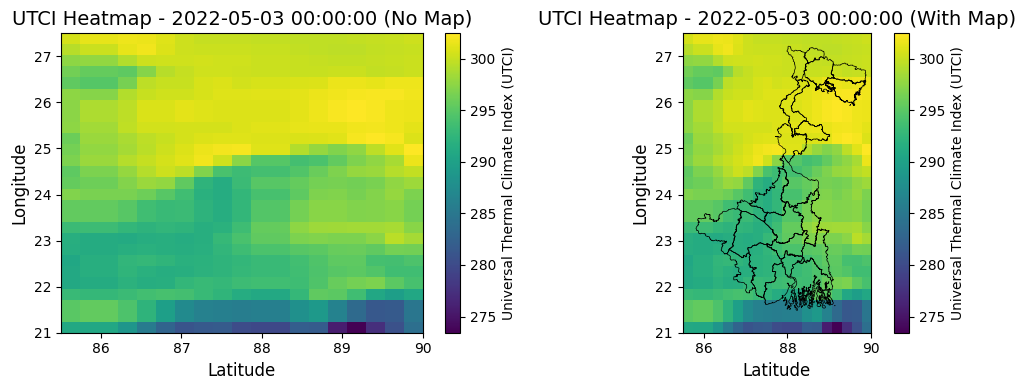

In [84]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

geojson_file = "WEST BENGAL_DISTRICTS.geojson"  
gdf = gpd.read_file(geojson_file)
print("GeoJSON CRS:", gdf.crs)
gdf = gdf.to_crs(epsg=4326)  # Ensure it's in the same CRS as lat/lon data


file_path = "2022_mrt_csv_with_utci/mrt_with_utci_20220503.csv"  
data = pd.read_csv(file_path)

data['time'] = pd.to_datetime(data['time'])

time_slice = data['time'].iloc[0]
data_time_slice = data[data['time'] == time_slice]

heatmap_utci = data_time_slice.pivot_table(index='lat', columns='lon', values='utci')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

ax_no_map = axes[0]
heatmap_no_map = ax_no_map.imshow(
    heatmap_utci, cmap="viridis", aspect='auto',
    extent=[data['lon'].min(), data['lon'].max(), data['lat'].min(), data['lat'].max()]
)
cbar_no_map = fig.colorbar(heatmap_no_map, ax=ax_no_map)
cbar_no_map.set_label('Universal Thermal Climate Index (UTCI)')

ax_no_map.set_title(f"UTCI Heatmap - {time_slice} (No Map)", fontsize=14)
ax_no_map.set_ylabel("Longitude", fontsize=12)
ax_no_map.set_xlabel("Latitude", fontsize=12)


ax_with_map = axes[1]
heatmap_with_map = ax_with_map.imshow(
    heatmap_utci, cmap="viridis", aspect='auto',
    extent=[data['lon'].min(), data['lon'].max(), data['lat'].min(), data['lat'].max()]
)
cbar_with_map = fig.colorbar(heatmap_with_map, ax=ax_with_map)
cbar_with_map.set_label('Universal Thermal Climate Index (UTCI)')


gdf.plot(ax=ax_with_map, color='none', edgecolor='black', linewidth=0.5)

ax_with_map.set_title(f"UTCI Heatmap - {time_slice} (With Map)", fontsize=14)
ax_with_map.set_ylabel("Longitude", fontsize=12)
ax_with_map.set_xlabel("Latitude", fontsize=12)


plt.tight_layout()


plt.show()


GeoJSON CRS: EPSG:4326


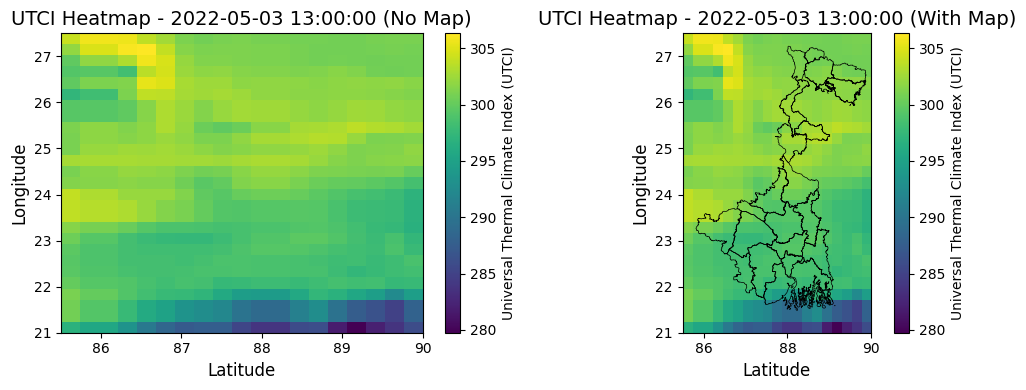

In [107]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

geojson_file = "WEST BENGAL_DISTRICTS.geojson"  
gdf = gpd.read_file(geojson_file)

print("GeoJSON CRS:", gdf.crs)
gdf = gdf.to_crs(epsg=4326)

file_path = "2022_mrt_csv_with_utci/mrt_with_utci_20220503.csv"  
data = pd.read_csv(file_path)

data['time'] = pd.to_datetime(data['time'])
target_time=13
time_slice = data[data['time'].dt.hour == target_time]

if not time_slice.empty:
    time_label = time_slice['time'].iloc[0].strftime('%Y-%m-%d %H:%M:%S')
    heatmap_utci = time_slice.pivot_table(index='lat', columns='lon', values='utci')

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    ax_no_map = axes[0]
    heatmap_no_map = ax_no_map.imshow(
        heatmap_utci, cmap="viridis", aspect='auto',
        extent=[data['lon'].min(), data['lon'].max(), data['lat'].min(), data['lat'].max()]
    )
    cbar_no_map = fig.colorbar(heatmap_no_map, ax=ax_no_map)
    cbar_no_map.set_label('Universal Thermal Climate Index (UTCI)')

    ax_no_map.set_title(f"UTCI Heatmap - {time_label} (No Map)", fontsize=14)
    ax_no_map.set_ylabel("Longitude", fontsize=12)
    ax_no_map.set_xlabel("Latitude", fontsize=12)

    ax_with_map = axes[1]
    heatmap_with_map = ax_with_map.imshow(
        heatmap_utci, cmap="viridis", aspect='auto',
        extent=[data['lon'].min(), data['lon'].max(), data['lat'].min(), data['lat'].max()]
    )
    cbar_with_map = fig.colorbar(heatmap_with_map, ax=ax_with_map)
    cbar_with_map.set_label('Universal Thermal Climate Index (UTCI)')

    gdf.plot(ax=ax_with_map, color='none', edgecolor='black', linewidth=0.5)

    ax_with_map.set_title(f"UTCI Heatmap - {time_label} (With Map)", fontsize=14)
    ax_with_map.set_ylabel("Longitude", fontsize=12)
    ax_with_map.set_xlabel("Latitude", fontsize=12)

    plt.tight_layout()
    plt.show()
else:
    print("No data available for the specified time.")


GeoJSON CRS: EPSG:4326


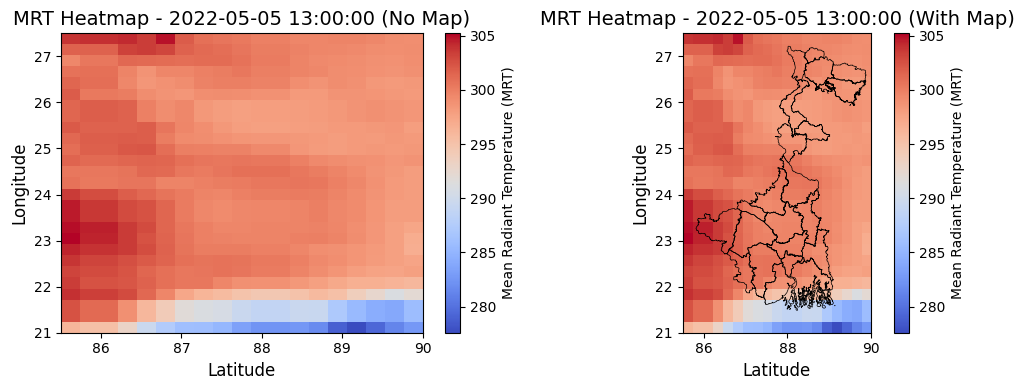

In [140]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

geojson_file = "WEST BENGAL_DISTRICTS.geojson"  
gdf = gpd.read_file(geojson_file)

print("GeoJSON CRS:", gdf.crs)
gdf = gdf.to_crs(epsg=4326)

file_path = "2022_mrt_csv_with_utci/mrt_with_utci_20220505.csv"  
data = pd.read_csv(file_path)


data['time'] = pd.to_datetime(data['time'])
target_time_mrt=13
time_slice = data[data['time'].dt.hour == target_time_mrt]

if not time_slice.empty:
    
    time_label = time_slice['time'].iloc[0].strftime('%Y-%m-%d %H:%M:%S')
    heatmap_mrt = time_slice.pivot_table(index='lat', columns='lon', values='mrt')
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    ax_no_map = axes[0]
    heatmap_no_map = ax_no_map.imshow(
        heatmap_mrt, cmap="coolwarm", aspect='auto',
        extent=[data['lon'].min(), data['lon'].max(), data['lat'].min(), data['lat'].max()]
    )
    cbar_no_map = fig.colorbar(heatmap_no_map, ax=ax_no_map)
    cbar_no_map.set_label('Mean Radiant Temperature (MRT)')

    ax_no_map.set_title(f"MRT Heatmap - {time_label} (No Map)", fontsize=14)
    ax_no_map.set_ylabel("Longitude", fontsize=12)
    ax_no_map.set_xlabel("Latitude", fontsize=12)

    ax_with_map = axes[1]
    heatmap_with_map = ax_with_map.imshow(
        heatmap_mrt, cmap="coolwarm", aspect='auto',
        extent=[data['lon'].min(), data['lon'].max(), data['lat'].min(), data['lat'].max()]
    )
    cbar_with_map = fig.colorbar(heatmap_with_map, ax=ax_with_map)
    cbar_with_map.set_label('Mean Radiant Temperature (MRT)')

    gdf.plot(ax=ax_with_map, color='none', edgecolor='black', linewidth=0.5)

    ax_with_map.set_title(f"MRT Heatmap - {time_label} (With Map)", fontsize=14)
    ax_with_map.set_ylabel("Longitude", fontsize=12)
    ax_with_map.set_xlabel("Latitude", fontsize=12)

    plt.tight_layout()
    plt.show()
else:
    print("No data available for 12:00 PM.")

GeoJSON CRS: EPSG:4326


Enter the start date (YYYY-MM-DD):  2022-05-02
Enter the end date (YYYY-MM-DD):  2022-05-07


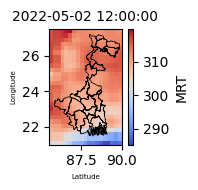

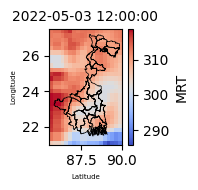

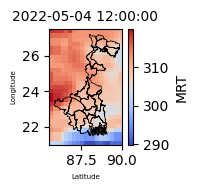

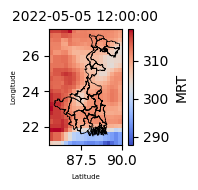

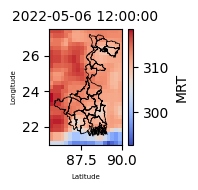

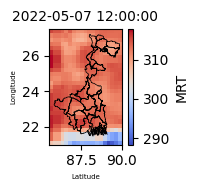

In [126]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

geojson_file = "WEST BENGAL_DISTRICTS.geojson"  
gdf = gpd.read_file(geojson_file)
print("GeoJSON CRS:", gdf.crs)
gdf = gdf.to_crs(epsg=4326)

directory_path = "2022_mrt_csv_with_utci"  


start_date = pd.to_datetime(input("Enter the start date (YYYY-MM-DD): "))
end_date = pd.to_datetime(input("Enter the end date (YYYY-MM-DD): "))
target_time_mrt = 12  


for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory_path, filename)
        data = pd.read_csv(file_path)
        data['time'] = pd.to_datetime(data['time'])
        date_range_filter = (data['time'].dt.date >= start_date.date()) & \
                            (data['time'].dt.date <= end_date.date())
        time_filter = data['time'].dt.hour == target_time_mrt
        filtered_data = data[date_range_filter & time_filter]

        
        if not filtered_data.empty:
            grouped_data = filtered_data.groupby(filtered_data['time'].dt.date)

            for date, group in grouped_data:
                time_label = group['time'].iloc[0].strftime('%Y-%m-%d %H:%M:%S')
                heatmap_mrt = group.pivot_table(index='lat', columns='lon', values='mrt')

                fig, ax_with_map = plt.subplots(figsize=(2, 2))

                heatmap_with_map = ax_with_map.imshow(
                    heatmap_mrt, cmap="coolwarm", aspect='auto',
                    extent=[data['lon'].min(), data['lon'].max(), data['lat'].min(), data['lat'].max()]
                )
                cbar_with_map = fig.colorbar(heatmap_with_map, ax=ax_with_map)
                cbar_with_map.set_label('MRT')

                gdf.plot(ax=ax_with_map, color='none', edgecolor='black', linewidth=0.5)

                ax_with_map.set_title(f"{time_label}", fontsize=10)
                ax_with_map.set_ylabel("Longitude", fontsize=7)
                ax_with_map.set_xlabel("Latitude", fontsize=7)

                plt.tight_layout()
                plt.show()

GeoJSON CRS: EPSG:4326


Enter the start date (YYYY-MM-DD):  2022-05-03
Enter the end date (YYYY-MM-DD):  2022-05-04


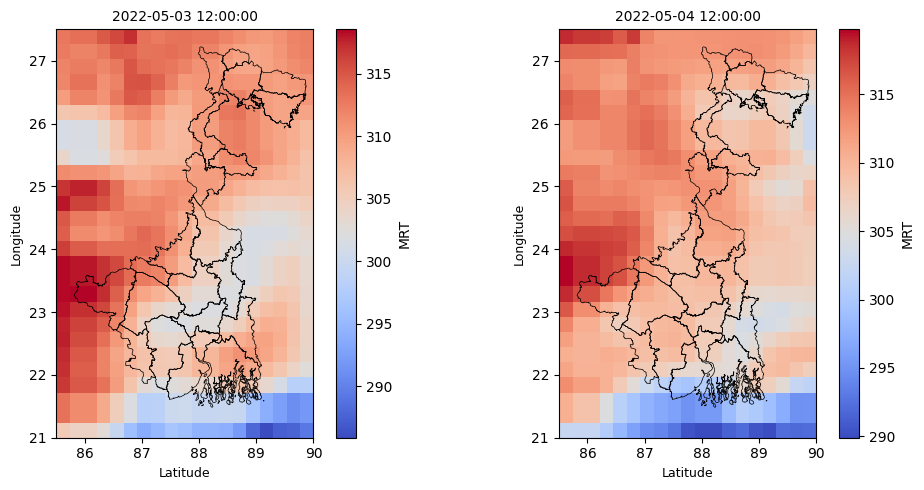

In [135]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

geojson_file = "WEST BENGAL_DISTRICTS.geojson"  
gdf = gpd.read_file(geojson_file)
print("GeoJSON CRS:", gdf.crs)
gdf = gdf.to_crs(epsg=4326)

directory_path = "2022_mrt_csv_with_utci"

start_date = pd.to_datetime(input("Enter the start date (YYYY-MM-DD): "))
end_date = pd.to_datetime(input("Enter the end date (YYYY-MM-DD): "))
target_time_mrt = 12  

heatmaps = []

for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory_path, filename)
        data = pd.read_csv(file_path)
        data['time'] = pd.to_datetime(data['time'])

        date_range_filter = (data['time'].dt.date >= start_date.date()) & \
                            (data['time'].dt.date <= end_date.date())
        time_filter = data['time'].dt.hour == target_time_mrt
        filtered_data = data[date_range_filter & time_filter]

        if not filtered_data.empty:
            grouped_data = filtered_data.groupby(filtered_data['time'].dt.date)

            for date, group in grouped_data:
                time_label = group['time'].iloc[0].strftime('%Y-%m-%d %H:%M:%S')
                heatmap_mrt = group.pivot_table(index='lat', columns='lon', values='mrt')
                heatmaps.append((time_label, heatmap_mrt))

num_heatmaps = len(heatmaps)
if num_heatmaps > 0:
    cols = 3  # Number of columns in the grid
    rows = (num_heatmaps + cols - 1) // cols  # Calculate rows needed
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), squeeze=False)

    for idx, (time_label, heatmap_mrt) in enumerate(heatmaps):
        row, col = divmod(idx, cols)
        ax = axes[row, col]

        heatmap_with_map = ax.imshow(
            heatmap_mrt, cmap="coolwarm", aspect='auto',
            extent=[
                heatmap_mrt.columns.min(), heatmap_mrt.columns.max(),
                heatmap_mrt.index.min(), heatmap_mrt.index.max()
            ]
        )
        cbar_with_map = fig.colorbar(heatmap_with_map, ax=ax)
        cbar_with_map.set_label('MRT')

        gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

        ax.set_title(f"{time_label}", fontsize=10)
        ax.set_ylabel("Longitude", fontsize=9)
        ax.set_xlabel("Latitude", fontsize=9)

    
    for idx in range(num_heatmaps, rows * cols):
        fig.delaxes(axes[idx // cols, idx % cols])

    plt.tight_layout()
    plt.show()

GeoJSON CRS: EPSG:4326


Enter the start date (YYYY-MM-DD):  2022-05-03
Enter the end date (YYYY-MM-DD):  2022-05-04


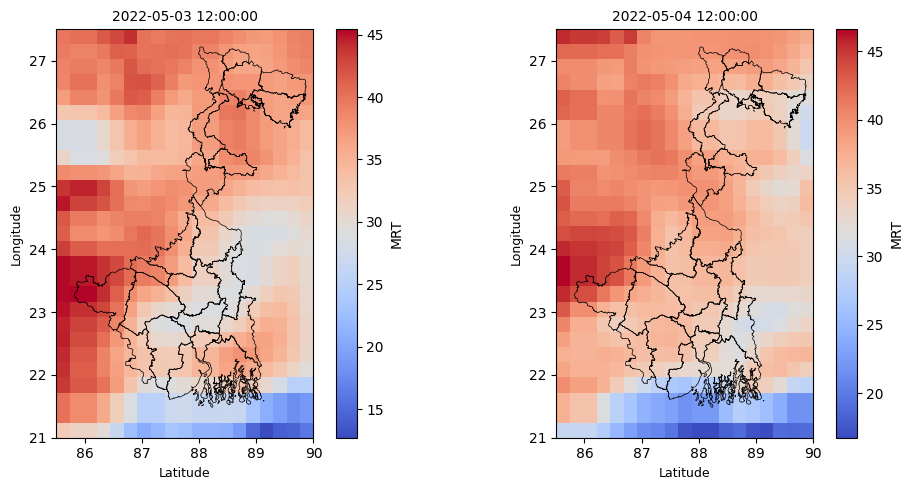

In [138]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

geojson_file = "WEST BENGAL_DISTRICTS.geojson"  
gdf = gpd.read_file(geojson_file)
print("GeoJSON CRS:", gdf.crs)
gdf = gdf.to_crs(epsg=4326)

directory_path = "2022_mrt_csv_with_utci"

start_date = pd.to_datetime(input("Enter the start date (YYYY-MM-DD): "))
end_date = pd.to_datetime(input("Enter the end date (YYYY-MM-DD): "))
target_time_mrt = 12  

heatmaps = []

for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory_path, filename)
        data = pd.read_csv(file_path)
        data['time'] = pd.to_datetime(data['time'])

        date_range_filter = (data['time'].dt.date >= start_date.date()) & \
                            (data['time'].dt.date <= end_date.date())
        time_filter = data['time'].dt.hour == target_time_mrt
        filtered_data = data[date_range_filter & time_filter]

        if not filtered_data.empty:
            grouped_data = filtered_data.groupby(filtered_data['time'].dt.date)

            for date, group in grouped_data:
                time_label = group['time'].iloc[0].strftime('%Y-%m-%d %H:%M:%S')
                heatmap_mrt = group.pivot_table(index='lat', columns='lon', values='MRT_Celsius')
                heatmaps.append((time_label, heatmap_mrt))

num_heatmaps = len(heatmaps)
if num_heatmaps > 0:
    cols = 3  # Number of columns in the grid
    rows = (num_heatmaps + cols - 1) // cols  # Calculate rows needed
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), squeeze=False)

    for idx, (time_label, heatmap_mrt) in enumerate(heatmaps):
        row, col = divmod(idx, cols)
        ax = axes[row, col]

        heatmap_with_map = ax.imshow(
            heatmap_mrt, cmap="coolwarm", aspect='auto',
            extent=[
                heatmap_mrt.columns.min(), heatmap_mrt.columns.max(),
                heatmap_mrt.index.min(), heatmap_mrt.index.max()
            ]
        )
        cbar_with_map = fig.colorbar(heatmap_with_map, ax=ax)
        cbar_with_map.set_label('MRT')

        gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

        ax.set_title(f"{time_label}", fontsize=10)
        ax.set_ylabel("Longitude", fontsize=9)
        ax.set_xlabel("Latitude", fontsize=9)

    
    for idx in range(num_heatmaps, rows * cols):
        fig.delaxes(axes[idx // cols, idx % cols])

    plt.tight_layout()
    plt.show()